# Bank Customer Churn Prediction

Customer churn is a term used to refer to customers who leave the financial institution they've been working with. It has emerged as one of the major problems for financial institutions including banks

<b> OVERVIEW ON THE DATASET </b>

   * The dataset is a labelled dataset (has features determining the target) thus we'll use Supervised Learning models.The target column is classifying the customer into Churned customer or not, thus we'll implement Classification models

<b> PERFORMANCE METRICS </b>

   * Since Objective of our problem is to predict churn customer .So we need to reduce False negtive error ,that means we need  to increase Recall score .So we will cross validate our data in term of recall score , and We will consider F2 score for model selection because F2 score gives more attention to recall than precision

<b> IMPORT NECESSARY LIBRARIES <b>

In [81]:
#import libraries for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [407]:
#import libraries for modelling
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve,roc_auc_score,classification_report,f1_score,recall_score,fbeta_score
from keras.models import Sequential
from keras.callbacks import Callback,EarlyStopping,History,ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
from keras.layers import Dense,BatchNormalization

In [408]:
import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats

IMPORT DATA

In [84]:
 data=pd.read_csv('../RN7/data/BankCustomers.csv',encoding= 'unicode_escape')

In [85]:
data.shape

(10000, 14)

In [86]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [89]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


CreditScore: the range of credit score is from 350 to 850

Geography: the regional bank has customers from three countries: France, Germany and Spain

Age: the range of customer’s age is from 18 to 92

Tenure: years that the customer has stayed with the bank

Balance: the amount of money available for withdrawal

NumOfProducts: number of products that the customers use in the bank

IsActiveMember: 1 indicates is active

EstimatedSalary: customer’s self-reported annual salary

Exited: whether the customer has churned (closed the bank account), 1 indicates churn.

In [90]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

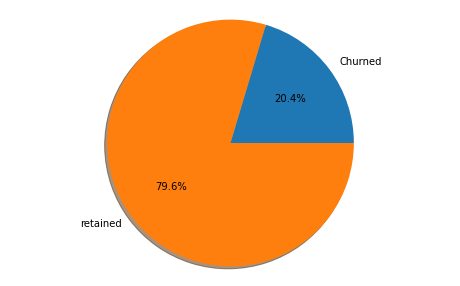

In [91]:

size=[data[data.Exited==1].count().Exited,data[data.Exited==0].count().Exited]
label=['Churned','retained']
fig,ax=plt.subplots(figsize=(8,5))
ax.pie(size,labels=label,autopct='%1.1f%%',shadow=True,)
ax.axis('equal')
plt.show()

In [92]:
numerical_variable=['CreditScore','Age','Balance','EstimatedSalary']

## Feature Exploration

### Continous Feature

### <b> 1. Age </b>

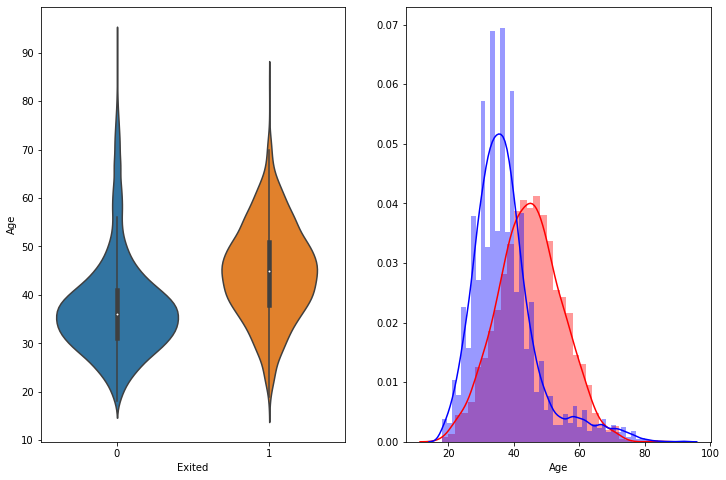

In [93]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Exited', y = 'Age', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Exited'] == 1]['Age'] , color = 'red')
sns.distplot(data[data['Exited'] == 0]['Age']  , color = 'blue' )
plt.show()

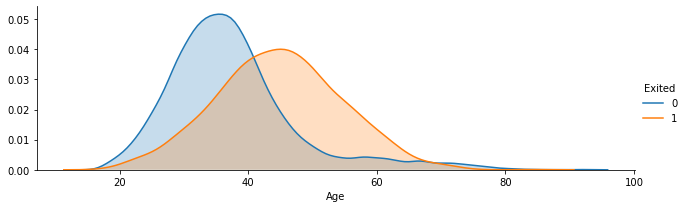

In [94]:
face = sns.FacetGrid(data, hue="Exited",aspect=3)
face.map(sns.kdeplot,"Age",shade= True)
face.add_legend()
plt.show()

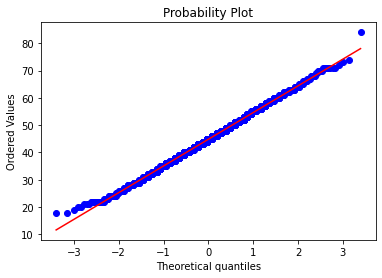

In [95]:
#Q-Q Plot
import pylab
stats.probplot(data[data["Exited"]==1]["Age"],plot=pylab)
pylab.show()

#### Age of churned customer follow Gaussian Distribution

In [96]:
age_mean=data[data["Exited"]==1]["Age"].mean()
std_mean=data[data["Exited"]==1]["Age"].std()
age_mean-(2*std_mean),age_mean+(2*std_mean),

(25.31487394347752, 64.36112016550628)

* So age of 95% of churned customer lies within 2nd standard deviation i:e 25 to 65 range.But the age range which has most no of churned customer is 40-50
* Non-churned customers have a right-skewed distribution (tend to be young). Outliers above 60 years old maybe our stable customers.

In [97]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data["Age"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 18
10 percentile value is 27
20 percentile value is 31
30 percentile value is 33
40 percentile value is 35
50 percentile value is 37
60 percentile value is 40
70 percentile value is 42
80 percentile value is 46
90 percentile value is 53
100 percentile value is  92


In [98]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =data["Age"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 53
91 percentile value is 54
92 percentile value is 56
93 percentile value is 57
94 percentile value is 58
95 percentile value is 60
96 percentile value is 62
97 percentile value is 64
98 percentile value is 67
99 percentile value is 72
100 percentile value is  92


* Here we can conclude Age more than 73 as outlier

In [106]:
Q1=np.percentile(data["Age"],25)
Q3=np.percentile(data["Age"],75)
IQR=Q3-Q1
upper_limit=Q3+2*IQR
lower_limit=Q1-2*IQR
lower_limit,upper_limit

(8.0, 68.0)

In [108]:
data=data[data["Age"]<=73]

### 2. Balance

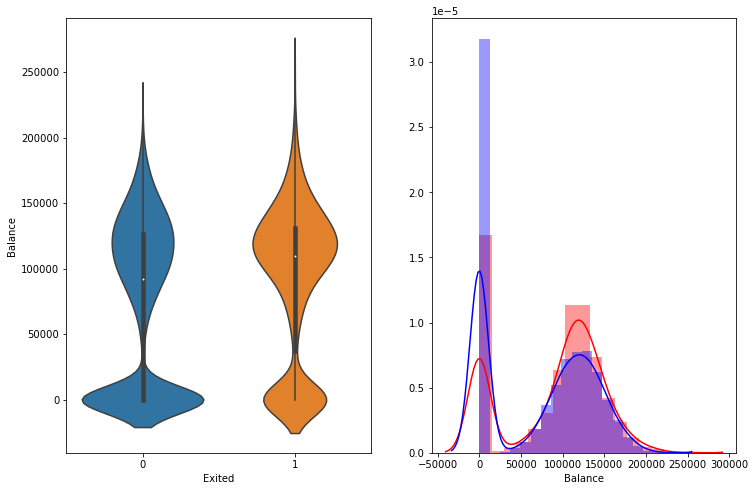

In [110]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Exited', y = 'Balance', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Exited'] == 1]['Balance'] , color = 'red')
sns.distplot(data[data['Exited'] == 0]['Balance']  , color = 'blue' )
plt.show()

* We can see the distribution of these two groups are quite similar.
* Surprisingly some non-churned customers have lower balance than churned customers.

In [111]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data["Balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 73194.99
50 percentile value is 97266.1
60 percentile value is 110203.77
70 percentile value is 122104.79
80 percentile value is 133800.98
90 percentile value is 149332.48
100 percentile value is  250898.09


In [112]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =data["Balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 149332.48
91 percentile value is 151739.65
92 percentile value is 153590.73
93 percentile value is 156007.09
94 percentile value is 159203.71
95 percentile value is 163034.82
96 percentile value is 166685.92
97 percentile value is 170840.08
98 percentile value is 176958.46
99 percentile value is 185966.64
100 percentile value is  250898.09


In [113]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =data[data["Exited"]==1]["Balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 152086.15
91 percentile value is 154110.99
92 percentile value is 156674.2
93 percentile value is 159441.27
94 percentile value is 163760.82
95 percentile value is 167831.88
96 percentile value is 170935.94
97 percentile value is 176173.52
98 percentile value is 185078.26
99 percentile value is 198546.1
100 percentile value is  250898.09


* Here we can conclude Balance more than 200000 as outlier

In [114]:
data=data[data["Balance"]<200000]

In [115]:
data.shape

(9894, 14)

### 3.CreditScore

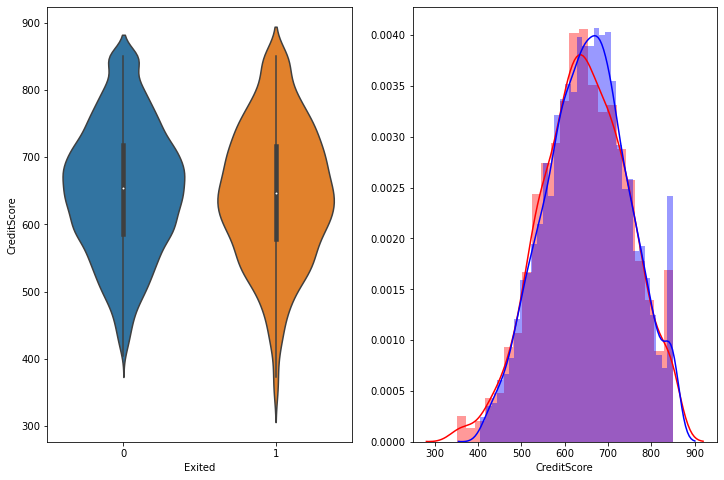

In [116]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Exited', y = 'CreditScore', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Exited'] == 1]['CreditScore'] , color = 'red')
sns.distplot(data[data['Exited'] == 0]['CreditScore']  , color = 'blue' )
plt.show()

 * There is no such difference in CreditScore distribution between retained and churned data.But,There is some outlier which is the customer having very low credit score.Some customers with extremely low credit score (on the left tail) churned, it indicates that really low  quality customer are easily churn than the average quality customer.

In [117]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data["CreditScore"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 350
10 percentile value is 521
20 percentile value is 566
30 percentile value is 598
40 percentile value is 627
50 percentile value is 652
60 percentile value is 678
70 percentile value is 704
80 percentile value is 735
90 percentile value is 778
100 percentile value is  850


In [118]:
#looking further from the 99th percecntile
for i in range(0,10):
    var =data["CreditScore"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 350
1 percentile value is 432
2 percentile value is 452
3 percentile value is 468
4 percentile value is 479
5 percentile value is 489
6 percentile value is 497
7 percentile value is 504
8 percentile value is 511
9 percentile value is 516
100 percentile value is  850


### 4. EstimatedSalary

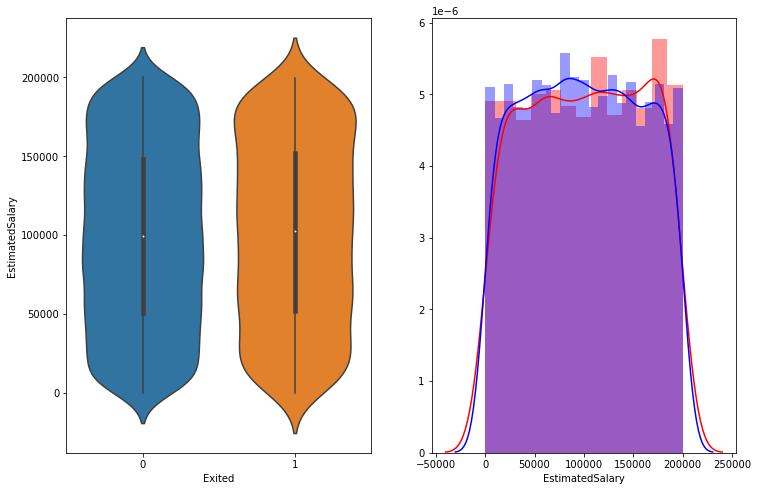

In [119]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Exited', y = 'EstimatedSalary', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Exited'] == 1]['EstimatedSalary'] , color = 'red')
sns.distplot(data[data['Exited'] == 0]['EstimatedSalary']  , color = 'blue' )
plt.show()

* Both groups have a very similar distribution. Esimated Salary might not be a very important infomation to decide if a customer will churn or not.

### Correlation Matrix

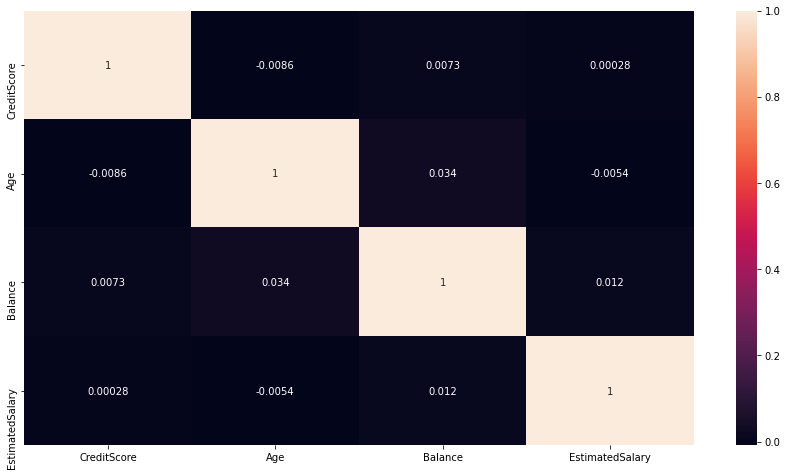

In [120]:
plt.figure(figsize=(15,8))
sns.heatmap(data[numerical_variable].corr(),annot=True,)

* I don’t see any high correlation between the continuous variables (i.e. no multicollinearity). So I’ll keep all this continuous variables.

### Categorical Feature

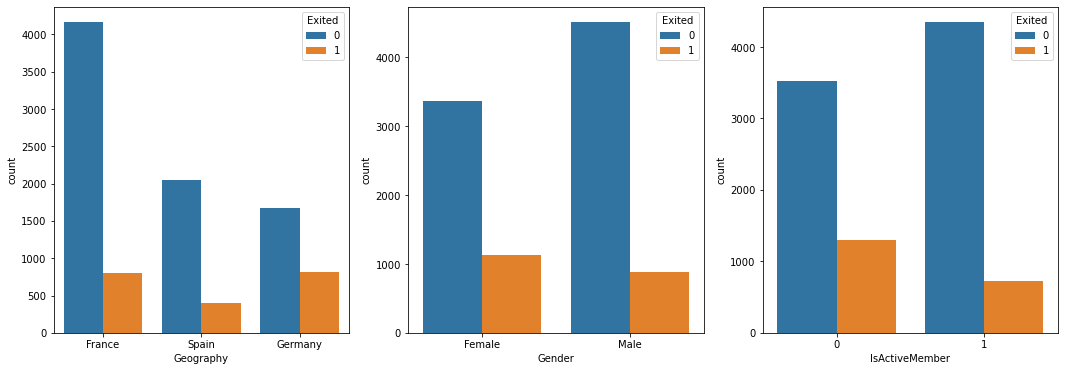

In [121]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Geography',data=data,hue='Exited',ax=ax[0])
sns.countplot(x='Gender',data=data,hue='Exited',ax=ax[1])
sns.countplot(x='IsActiveMember',data=data,hue='Exited',ax=ax[2])

* Majority of data from France
* Germany has highest number of churn
* Female are more likely to exited than male along all the region
* In-active customers are more likely to churn than active 
* We have an almost equal number of active and non-active members, not a very good sign

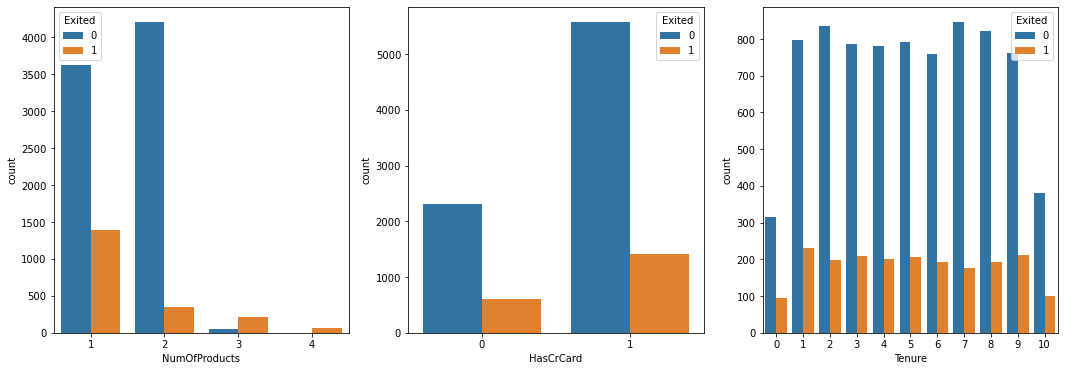

In [122]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='NumOfProducts',data=data,hue='Exited',ax=ax[0])
sns.countplot(x='HasCrCard',data=data,hue='Exited',ax=ax[1])
sns.countplot(x='Tenure',data=data,hue='Exited',ax=ax[2])

In [123]:
x=pd.crosstab(index=data["HasCrCard"],columns=data["Exited"])
x["Total"]=x.sum(axis=1)
x["percentage"]=x[1]/x["Total"]
x

Exited,0,1,Total,percentage
HasCrCard,,,,
0,2306,602,2908,0.207015
1,5572,1414,6986,0.202405


* Most of the customers use one or two kinds of products, with a very few use three or four products
* Customers using 3 or 4 products are more likely to churned
* Most of the customers have the bank’s credit card
* Percentage of Churn Customers is almost same for both category of HasCrCard.So we can't conclude anything from this feature 

### FEATURE SELECTION

### Chi Square Test

In [124]:
#checking Relation b/w categorical variables with respect to target var
#Null hypothesis:Features are independent
#Alternate Hypothesis:Features are not independent
#If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
#If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

#If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
#If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

# If we reject null hypothesis

def test_chi2_significance(col,data,alpha=0.05):
    from scipy.stats import chi2_contingency
    chi_value=[]
    p_value=[]
    for column in col:
        chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['Exited'],data[column]))
        chi_value.append(chi2)
        p_value.append(p)
        print(column)
        print('*'*50)
        print("P-value:{}".format(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (fail to reject H0)')
        print('\n')   
    tab=pd.DataFrame({"column":col,"chi_statistic":chi_value,"P_value":p_value})
    return tab
        #as above pd.crosstab(dependent variable , independent variable)

In [125]:
cat_col=[col for col in data.columns if col not in numerical_variable]

In [126]:
test_chi2_significance(cat_col,data)

RowNumber
**************************************************
P-value:0.49527327588557785
Independent (fail to reject H0)


CustomerId
**************************************************
P-value:0.49527327588557785
Independent (fail to reject H0)


Surname
**************************************************
P-value:0.9804772562962711
Independent (fail to reject H0)


Geography
**************************************************
P-value:7.85498790759565e-69
Dependent (reject H0)


Gender
**************************************************
P-value:3.379154590249132e-26
Dependent (reject H0)


Tenure
**************************************************
P-value:0.1618912127966001
Independent (fail to reject H0)


NumOfProducts
**************************************************
P-value:0.0
Dependent (reject H0)


HasCrCard
**************************************************
P-value:0.6232449099231442
Independent (fail to reject H0)


IsActiveMember
**************************************************

,column,chi_statistic,P_value
0,RowNumber,9894.000000,4.952733e-01
1,CustomerId,9894.000000,4.952733e-01
2,Surname,2759.607506,9.804773e-01
3,Geography,313.634445,7.854988e-69
4,Gender,112.110647,3.379155e-26
5,Tenure,14.249988,1.618912e-01
6,NumOfProducts,1501.661197,0.000000e+00
7,HasCrCard,0.241333,6.232449e-01
8,IsActiveMember,239.257995,5.708168e-54
9,Exited,9887.837319,0.000000e+00


* Every values in column RowNumber and CustomerId are distinct.These Features are not relevant to our model.So drop this feature
* The p-values for Tenure and HasCrCard are greater than 0.05,Hence we fail to reject the null hypothesis which means these features are independent to our target variable
* Hence we drop these  features

In [128]:
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,1,112542.58,0
2,502,France,Female,42,159660.80,3,0,113931.57,1
3,699,France,Female,39,0.00,2,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,79084.10,0


In [127]:
#Drop unnecessary features
data.drop(["RowNumber","CustomerId","Surname","Tenure","HasCrCard"],axis=1,inplace=True)

In [133]:
#Convert categorical feature into numerical feature by using one-hot encoding
state=pd.get_dummies(data['Geography'])
gender=pd.get_dummies(data['Gender'])

#concatenate newly created feature with X
data=pd.concat([data,state,gender],axis=1)

#Drop unnecessary features by droping column wise
data.drop(['Geography','Gender'],inplace=True,axis=1)

In [200]:
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [202]:
#create instance of StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

SAMPLING

In [336]:
#import packages for SMOTE
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE(random_state=42)
X_train_smote,y_train_smote=over_sampling.fit_sample(X_train_scaled,y_train)


In [337]:
#print("No of retained customer before sampling {} and no of churned customer before sampling {}".format(Counter(y_train)[0],Counter(y_train)[1]))
print("No of retained customer after sampling {} and no of churned customer after sampling {}".format(Counter(y_train)[0],Counter(y_train_smote)[1]))

No of retained customer after sampling 6302 and no of churned customer after sampling 6302


CREATE ANN MODEL

In [157]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [338]:
#Initialising the ANN
model=Sequential()
#add input layer and first hidden layer
model.add(Dense(6,input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add second hidden layer
model.add(Dense(6,activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add third hidden layer
model.add(Dense(6,activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
#add output layer
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
#compiling the ANN
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = [recall_m])

In [339]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 72        
_________________________________________________________________
batch_normalization_16 (Batc (None, 6)                 24        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_17 (Batc (None, 6)                 24        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_18 (Batc (None, 6)                 24        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

In [373]:
early_stopping=EarlyStopping(
    monitor='val_recall_m', min_delta=0, patience=5, verbose=0, mode='auto'
)

In [374]:
#reduce learning rate when loss stops improving
ReduceLR=ReduceLROnPlateau(monitor='val_recall_m', 
                                     factor=0.5, 
                                     verbose=1,
                                     patience=3,
                                     mode='auto',
                                     min_lr=0.00001
                                     )

In [375]:
#Fitting the ANN to the training set
history=model.fit(X_train_smote,y_train_smote,epochs=100,batch_size=64,validation_split=0.2,callbacks=[early_stopping,ReduceLR])

Train on 10083 samples, validate on 2521 samples
Epoch 1/100
10083/10083 [==============================] - 1s 91us/step - loss: 0.4050 - recall_m: 0.6820 - val_loss: 0.5914 - val_recall_m: 0.6707
Epoch 2/100
10083/10083 [==============================] - 1s 88us/step - loss: 0.4033 - recall_m: 0.6868 - val_loss: 0.5894 - val_recall_m: 0.6743
Epoch 3/100
10083/10083 [==============================] - 1s 88us/step - loss: 0.4058 - recall_m: 0.6820 - val_loss: 0.5885 - val_recall_m: 0.6731
Epoch 4/100
10083/10083 [==============================] - 1s 89us/step - loss: 0.4037 - recall_m: 0.6819 - val_loss: 0.5908 - val_recall_m: 0.6739

Epoch 00004: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 5/100
10083/10083 [==============================] - 1s 90us/step - loss: 0.4029 - recall_m: 0.6806 - val_loss: 0.5835 - val_recall_m: 0.6762
Epoch 6/100
10083/10083 [==============================] - 1s 94us/step - loss: 0.4043 - recall_m: 0.6801 - val_loss: 0.5861 - val

In [376]:
#evaluate model performance
eva=model.evaluate(X_test_scaled,y_test)
print("loss value of model is {} and accuracy is {}".format(eva[0],eva[1]))

1979/1979 [==============================] - 0s 59us/step
loss value of model is 0.3752561866966024 and accuracy is 0.6348403692245483


In [377]:
prediction = model.predict(X_test_normalized)
y_pred=[]
for i in range(len(prediction)):
    if prediction[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("weighted F1_score is :{}".format(f1_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("Beta F1_score is :{}".format(fbeta_score(y_test,y_pred,average='weighted',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8489135927235978
**************************************************
weighted F1_score is :0.848843709385776
**************************************************
Beta F1_score is :0.848885574665526
**************************************************
Recall score is :0.8489135927235978
**************************************************
ROC_AUC score is :0.7666242080336562
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1576
           1       0.63      0.63      0.63       403

    accuracy                           0.85      1979
   macro avg       0.77      0.77      0.77      1979
weighted avg       0.85      0.85      0.85      1979

**************************************************
confusion matrix:
[[1427  149]
 [ 150  253]]


VISUALIZING MODEL PERFORMANCE

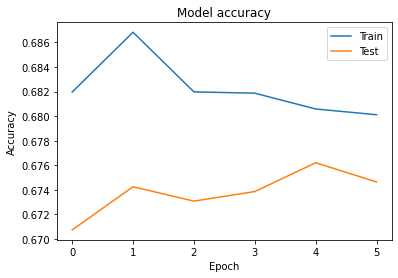

In [379]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [381]:
#import libraries for modelling
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,RandomizedSearchCV,KFold,LeaveOneOut
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve,roc_auc_score,classification_report,make_scorer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [382]:
#instantiate different model for tuning
tree=DecisionTreeClassifier(random_state=42)
forest=RandomForestClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
svc=SVC(random_state=42)

In [263]:
#initialise hyperparameter for tuning
random_forest_param={'n_estimators':[int(x) for x in np.linspace(start=100,stop=2000,num=10)],
                     'criterion':['gini','entropy'],
                     'max_depth':[int(x) for x in np.linspace(start=5,stop=50,num=15)]+[None]}
decision_tree_param={'criterion':['gini','entropy'],
                     'min_samples_leaf':[1,2,3,4]}
svm_param = {'C':[0.001, 0.01, 0.1, 1],
             'gamma':[0.00001, 0.0001, 0.001,0.005, 0.01,0.05, 0.1],
             'kernel':["linear","rbf"]}
log_reg_param={'C':[0.0001,0.001,0.01,0.1,1,10]}

In [264]:
#function for RandomizedSearchCV
def search(estimator,parameter,X_train,y_train):
    tune_model=RandomizedSearchCV(estimator=estimator,
                                      param_distributions=parameter,
                                      n_iter=100,cv=5,verbose=2,
                                      random_state=42,n_jobs=-1,refit=True,scoring="f1")
    tune_model.fit(X_train,y_train)
    return tune_model

In [265]:
#function to evaluate the classification model
def metrics(test,prediction):
    return confusion_matrix(test,prediction,[0,1]),classification_report(test,prediction),roc_auc_score(test,prediction)

In [254]:
from imblearn.pipeline import Pipeline, make_pipeline

In [308]:
def model_pipeline(params,model,X_train, y_train):
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
    #imba_pipeline = Pipeline(SMOTE(random_state=42),model)
    pipeline = Pipeline([("smote", SMOTE(random_state=42)), ("model", model)])
    new_params = {'model__' + key: params[key] for key in params}
    grid_imba = RandomizedSearchCV(pipeline, new_params, cv=kf, scoring='recall',
                        return_train_score=True)
    grid_imba.fit(X_train, y_train)
    return grid_imba

## Logistic Regression

In [309]:
lr_model=model_pipeline(log_reg_param,lr,X_train_scaled,y_train)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [291]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [310]:
lr_model.best_params_,lr_model.best_score_

({'model__C': 0.01}, 0.6912658885064322)

In [311]:
y_pred=lr_model.predict(X_test_scaled)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("weighted F1_score is :{}".format(f1_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("Beta F1_score is :{}".format(fbeta_score(y_test,y_pred,average='weighted',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='micro')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.7286508337544214
**************************************************
weighted F1_score is :0.7509181017578498
**************************************************
Beta F1_score is :0.7332811632049745
**************************************************
Recall score is :0.7286508337544214
**************************************************
ROC_AUC score is :0.7169727991837865
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1576
           1       0.40      0.70      0.51       403

    accuracy                           0.73      1979
   macro avg       0.65      0.72      0.66      1979
weighted avg       0.80      0.73      0.75      1979

**************************************************
confusion matrix:
[[1161  415]
 [ 122  281]]


In [258]:
lr_model.best_params_,lr_model.best_score_

({'model__C': 1}, 0.6923160327967766)

In [262]:
y_pred=lr_model.predict(X_test_scaled)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("F1_score is :{}".format(f1_score(y_test,y_pred)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred)))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.7271349166245579
**************************************************
F1_score is :0.5099818511796733
**************************************************
Recall score is :0.6972704714640199
**************************************************
ROC_AUC score is :0.7160210225340405
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1576
           1       0.40      0.70      0.51       403

    accuracy                           0.73      1979
   macro avg       0.65      0.72      0.66      1979
weighted avg       0.80      0.73      0.75      1979

**************************************************
confusion matrix:
[[1158  418]
 [ 122  281]]


## RandomForest Classifier

In [312]:
rf_model=model_pipeline(random_forest_param,forest,X_train,y_train)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [313]:
rf_model.best_params_,rf_model.best_score_

({'model__n_estimators': 944,
  'model__max_depth': 5,
  'model__criterion': 'entropy'},
 0.6069149856739035)

In [319]:
y_pred=rf_model.predict(X_test)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("weighted F1_score is :{}".format(f1_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("Beta F1_score is :{}".format(fbeta_score(y_test,y_pred,average='weighted',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8206164729661445
**************************************************
weighted F1_score is :0.8213501012370538
**************************************************
Beta F1_score is :0.8209051163269703
**************************************************
Recall score is :0.8206164729661445
**************************************************
ROC_AUC score is :0.7276186847375646
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1576
           1       0.56      0.57      0.56       403

    accuracy                           0.82      1979
   macro avg       0.72      0.73      0.73      1979
weighted avg       0.82      0.82      0.82      1979

**************************************************
confusion matrix:
[[1394  182]
 [ 173  230]]


In [288]:
y_pred=rf_model.predict(X_test)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("F1_score is :{}".format(f1_score(y_test,y_pred,average='micro')))
print('*'*50)
print("F1_score is :{}".format(fbeta_score(y_test,y_pred,average='micro',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='micro')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8287013643254169
**************************************************
F1_score is :0.8287013643254169
**************************************************
F1_score is :0.8287013643254169
**************************************************
Recall score is :0.8287013643254169
**************************************************
ROC_AUC score is :0.7290010832462118
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1576
           1       0.58      0.56      0.57       403

    accuracy                           0.83      1979
   macro avg       0.74      0.73      0.73      1979
weighted avg       0.83      0.83      0.83      1979

**************************************************
confusion matrix:
[[1414  162]
 [ 177  226]]


### XGBOOST

In [387]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [323]:
xgb=xgb.XGBClassifier()

In [324]:
params = {
    # Parameters that we are going to tune.
    'max_depth':range(9,12),
    'min_child_weight': range(5,8),
    'eta':[.3, .2, .1, .05, .01, .005],
    'subsample': [i/10. for i in range(7,11)],
    'colsample_bytree': [i/10. for i in range(7,11)]
    # Other parameters
}

In [326]:
xgb_model=model_pipeline(params,xgb,X_train,y_train)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [327]:
xgb_model.best_params_,xgb_model.best_score_

({'model__subsample': 0.7,
  'model__min_child_weight': 5,
  'model__max_depth': 10,
  'model__eta': 0.005,
  'model__colsample_bytree': 0.8},
 0.598250100955714)

In [335]:
y_pred=xgb_model.predict(X_test)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("weighted F1_score is :{}".format(f1_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("Beta F1_score is :{}".format(fbeta_score(y_test,y_pred,average='weighted',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.8468923698837797
**************************************************
weighted F1_score is :0.8436083674949237
**************************************************
Beta F1_score is :0.845461055104494
**************************************************
Recall score is :0.8468923698837797
**************************************************
ROC_AUC score is :0.7441161466664985
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1576
           1       0.64      0.57      0.60       403

    accuracy                           0.85      1979
   macro avg       0.77      0.74      0.75      1979
weighted avg       0.84      0.85      0.84      1979

**************************************************
confusion matrix:
[[1446  130]
 [ 173  230]]


### SVM

In [383]:
svm_model=model_pipeline(svm_param,svc,X_train_scaled,y_train)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [384]:
svm_model.best_params_,svm_model.best_score_

({'model__kernel': 'rbf', 'model__gamma': 0.05, 'model__C': 0.1},
 0.7309232159683096)

In [385]:
y_pred=svm_model.predict(X_test_scaled)
print("Accuracy is: {}".format(accuracy_score(y_test,y_pred)))
print('*'*50)
print("weighted F1_score is :{}".format(f1_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("Beta F1_score is :{}".format(fbeta_score(y_test,y_pred,average='weighted',beta=2)))
print('*'*50)
print("Recall score is :{}".format(recall_score(y_test,y_pred,average='weighted')))
print('*'*50)
print("ROC_AUC score is :{}".format(roc_auc_score(y_test,y_pred)))
print('*'*50)
print("Classification report:")
print(classification_report(y_test,y_pred))
print('*'*50)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.7882769075290551
**************************************************
weighted F1_score is :0.8020118186790479
**************************************************
Beta F1_score is :0.7915651316614596
**************************************************
Recall score is :0.7882769075290551
**************************************************
ROC_AUC score is :0.7645671423713015
**************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1576
           1       0.49      0.72      0.58       403

    accuracy                           0.79      1979
   macro avg       0.70      0.76      0.72      1979
weighted avg       0.83      0.79      0.80      1979

**************************************************
confusion matrix:
[[1268  308]
 [ 111  292]]


## Model Summary

In [388]:
#instantiate different model for tuning
randomforest=RandomForestClassifier(random_state=42)
logistic=LogisticRegression(C=0.01,random_state=42)
svm=SVC(random_state=42,kernel='rbf', gamma= 0.05,C=0.1)
xgbclassifier=xgb.XGBClassifier(subsample=0.7,min_child_weight=5,max_depth=10,eta=0.005,colsample_bytree=0.8)

In [390]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)



#create instance of StandardScaler
scaler=StandardScaler()
X_tr_scaled=scaler.fit_transform(X_train)
X_te_scaled=scaler.transform(X_test)



#import packages for SMOTE
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE(random_state=42)
X_linear_smote,y_linear_smote=over_sampling.fit_sample(X_tr_scaled,y_train)


from imblearn.over_sampling import SMOTE
over_sampling=SMOTE(random_state=42)
X_tree_smote,y_tree_smote=over_sampling.fit_sample(X_train,y_train)

In [391]:
random_forest.fit(X_tree_smote,y_tree_smote)
xgbclassifier.fit(X_tree_smote,y_tree_smote)
svm.fit(X_linear_smote,y_linear_smote)
logistic.fit(X_linear_smote,y_linear_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 84.1min finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [410]:
model_name=["random_forest","XGBoost","Logistic Regression","SVM"]
f2_score=[fbeta_score(y_test,random_forest.predict(X_test),average='weighted',beta=2),
                     fbeta_score(y_test,xgbclassifier.predict(X_test),average='weighted',beta=2),
                     fbeta_score(y_test,svm.predict(X_te_scaled),average='weighted',beta=2),
                     fbeta_score(y_test,logistic.predict(X_te_scaled),average='weighted',beta=2)]
roc_auc=[roc_auc_score(y_test,random_forest.predict(X_test),average='weighted'),
                     roc_auc_score(y_test,xgbclassifier.predict(X_test),average='weighted'),
                     roc_auc_score(y_test,svm.predict(X_te_scaled),average='weighted'),
                     roc_auc_score(y_test,logistic.predict(X_te_scaled),average='weighted')]
recall=[recall_score(y_test,random_forest.predict(X_test)),
                     recall_score(y_test,xgbclassifier.predict(X_test)),
                     recall_score(y_test,svm.predict(X_te_scaled)),
                     recall_score(y_test,logistic.predict(X_te_scaled))]
result=pd.DataFrame({"Model":model_name,"F2 Score":f2_score,"Recall":recall,"ROC AUC score":roc_auc})

In [411]:
result

,Model,F2 Score,Recall,ROC AUC score
0,random_forest,0.839816,0.516129,0.721262
1,XGBoost,0.845461,0.570720,0.744116
2,Logistic Regression,0.791565,0.724566,0.764567
3,SVM,0.733281,0.697270,0.716973


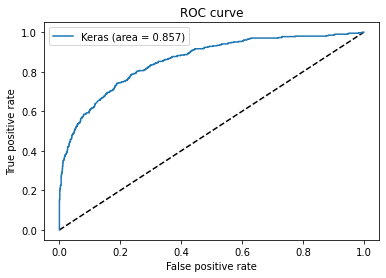

In [88]:
#ROC_AUC_CURVE IS GIVEN BELOW
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

CONCLUSION